In [210]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import tensorflow as tf

import keras_tuner as kt

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [212]:
df_insurance_claims = pd.read_csv("./Insurance_claims.csv")

In [213]:
df_insurance_claims.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0


In [214]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   ThirdPartyVehicleNumber          379 non-null    float64
 4   InsurerNotes                     9173 non-null   object 
 5   PolicyholderOccupation           11187 non-null  object 
 6   LossDate                         11530 non-null  object 
 7   FirstPolicySubscriptionDate      11530 non-null  object 
 8   ClaimCause                       11333 non-null  object 
 9   ClaimInvolvedCovers              11335 non-null  object 
 10  DamageImportance                 738 non-null    object 
 11  FirstPartyVehicleType            11518 non-null  object 
 12  ConnectionBetweenP

In [215]:
df_insurance_claims.isna().sum()

ReferenceId                            0
PolicyholderNumber                     0
FirstPartyVehicleNumber              495
ThirdPartyVehicleNumber            11151
InsurerNotes                        2357
PolicyholderOccupation               343
LossDate                               0
FirstPolicySubscriptionDate            0
ClaimCause                           197
ClaimInvolvedCovers                  195
DamageImportance                   10792
FirstPartyVehicleType                 12
ConnectionBetweenParties           11432
LossPostCode                        1408
PolicyHolderPostCode                   0
PolicyWasSubscribedOnInternet          0
NumberOfPoliciesOfPolicyholder         0
FpVehicleAgeMonths                    12
EasinessToStage                        0
ClaimWihoutIdentifiedThirdParty        0
ClaimAmount                            0
LossHour                              94
PolicyHolderAge                       36
NumberOfBodilyInjuries                 0
FirstPartyLiabil

In [216]:
nan_cols = df_insurance_claims.columns[df_insurance_claims.isna().any()].tolist()
nan_cols


['FirstPartyVehicleNumber',
 'ThirdPartyVehicleNumber',
 'InsurerNotes',
 'PolicyholderOccupation',
 'ClaimCause',
 'ClaimInvolvedCovers',
 'DamageImportance',
 'FirstPartyVehicleType',
 'ConnectionBetweenParties',
 'LossPostCode',
 'FpVehicleAgeMonths',
 'LossHour',
 'PolicyHolderAge']

<AxesSubplot:>

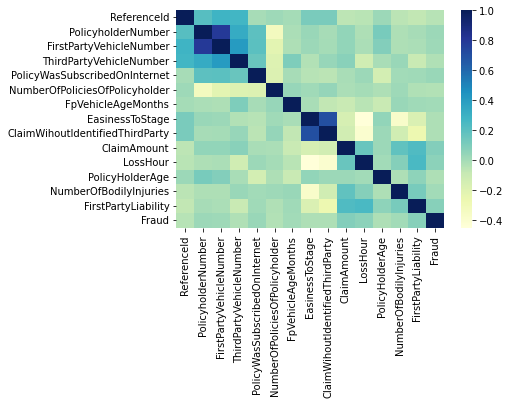

In [217]:
# Checking the correlations of Fraud status with other features
df_insurance_claims.corr(method ='pearson')

# Checking the correlations via the correlation heatmap
sns.heatmap(df_insurance_claims.corr(), cmap="YlGnBu")

In [218]:
# Pre-processing needed

# Drop duplicates
df_insurance_claims.drop_duplicates(inplace=True)
df_insurance_claims

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,16378,452486,626487.0,NaN,NaN,Employee,2/17/21,3/15/19,WindscreenDamage,Windscreen,...,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0
11526,16379,581104,788178.0,NaN,NaN,Employee,3/7/21,7/20/17,WindscreenDamage,Windscreen,...,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0
11527,16380,817231,NaN,NaN,NaN,Employee,3/15/21,9/30/20,WindscreenDamage,Windscreen,...,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0
11528,16381,321534,468522.0,NaN,NaN,CivilServant,3/6/21,12/28/18,WindscreenDamage,Windscreen,...,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0


In [219]:
nan_cols

['FirstPartyVehicleNumber',
 'ThirdPartyVehicleNumber',
 'InsurerNotes',
 'PolicyholderOccupation',
 'ClaimCause',
 'ClaimInvolvedCovers',
 'DamageImportance',
 'FirstPartyVehicleType',
 'ConnectionBetweenParties',
 'LossPostCode',
 'FpVehicleAgeMonths',
 'LossHour',
 'PolicyHolderAge']

In [220]:
# checking if there are any claims where the vehicle numbers of the first and thrid parties are the same.
# There are none
df_insurance_claims.loc[df_insurance_claims["FirstPartyVehicleNumber"]==df_insurance_claims['ThirdPartyVehicleNumber']]

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud


In [221]:
# drop rows where the columns have very few na values
# FirstPartyVehicleNumber, PolicyholderOccupation, ClaimCause, ClaimInvolvedCovers, FirstPartyVehicleType, LossPostCode,
# FpVehicleAgeMonths, LossHour, PolicyHolderAge
df_insurance_claims.dropna(subset=['FirstPartyVehicleNumber', 'PolicyholderOccupation', 'ClaimCause', 'ClaimInvolvedCovers', 
                                    'FirstPartyVehicleType', 'LossPostCode', 'FpVehicleAgeMonths', 'LossHour', 'PolicyHolderAge'],
                           inplace=True)

In [222]:
# Are the policy numbers unique, or are there any people who filed claims multiple times
def get_uniqueness(df, column_names):
    for column_name in column_names:
        print("{}: Column length: {}, unique values: {}".format(column_name, len(df[column_name]), df[column_name].nunique()))

get_uniqueness(df_insurance_claims, ["PolicyholderNumber"])

# Create a new column with count of claims made by the same policy holder.
# Multiple claims by the same policy holder may likely indicate a fraud.
counts_policy_holder = df_insurance_claims['PolicyholderNumber'].value_counts()
df_insurance_claims["PolicyHolderCount"] = df_insurance_claims["PolicyholderNumber"].map(counts_policy_holder)
df_insurance_claims[["PolicyholderNumber", "PolicyHolderCount"]]

PolicyholderNumber: Column length: 9120, unique values: 7659


,PolicyholderNumber,PolicyHolderCount
0,531112,1
1,87170,2
2,98706,2
3,38240,1
4,11339,4
...,...,...
11485,267178,1
11486,808381,1
11487,772615,1
11510,555135,1


In [223]:
# Column ClaimInvolvedCovers contains a space sepaated list of strings indicating the covers that the individual took
# We convert this into onehot encoded columns
one_hot = pd.get_dummies(df_insurance_claims["ClaimInvolvedCovers"].str.split(" ", expand=True).stack()).groupby(level=0).sum()
df_insurance_claims = pd.concat([df_insurance_claims, one_hot], axis=1)

In [224]:
# Remove the columns that have too many missing values and unnecessary comlumns such as Reference ID, PolicyHolderPostcode
df_insurance_claims.drop(columns = ["ReferenceId",                     # unique 
                                    "PolicyholderNumber",              # unique
                                    "FirstPartyVehicleNumber",         # unique    
                                    "ThirdPartyVehicleNumber",         # unique
                                    "InsurerNotes",                    # dropping for now
                                    "DamageImportance",                # too many nans
                                    "ConnectionBetweenParties",        # maybe we can fill
                                    "LossPostCode",                    # not necessary
                                    "PolicyHolderPostCode",            # not necessary
                                    "ClaimInvolvedCovers"              # already converted above
                                    ], inplace=True)

In [225]:
# reindex the data
df_insurance_claims.reset_index(inplace=True)

In [226]:
# Convert the dates to datetime objects
df_insurance_claims_t_days = df_insurance_claims[["LossDate", "FirstPolicySubscriptionDate", "Fraud"]]
df_insurance_claims_t_days["LossDate"] = pd.to_datetime(df_insurance_claims_t_days["LossDate"])
df_insurance_claims_t_days["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_t_days["FirstPolicySubscriptionDate"])

C:\Users\Soumya\AppData\Local\Temp\ipykernel_31760\3562087343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["LossDate"] = pd.to_datetime(df_insurance_claims_t_days["LossDate"])
C:\Users\Soumya\AppData\Local\Temp\ipykernel_31760\3562087343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_t_days["FirstPolicySubscriptionDate"])


### Model 1 - Using a threshold on the number of days between the subscription data and the claim date

In [227]:
df_insurance_claims_t_days["Days"] = df_insurance_claims_t_days["LossDate"] - df_insurance_claims_t_days["FirstPolicySubscriptionDate"]
df_insurance_claims_t_days["Days"] = pd.to_numeric(df_insurance_claims_t_days["Days"].dt.days, downcast='integer')
df_insurance_claims_t_days = df_insurance_claims_t_days.astype({"Days": "int64"})

C:\Users\Soumya\AppData\Local\Temp\ipykernel_31760\1156946861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["Days"] = df_insurance_claims_t_days["LossDate"] - df_insurance_claims_t_days["FirstPolicySubscriptionDate"]
C:\Users\Soumya\AppData\Local\Temp\ipykernel_31760\1156946861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["Days"] = pd.to_numeric(df_insurance_claims_t_days["Days"].dt.days, downcast='integer')


In [228]:
df_fraud = df_insurance_claims_t_days.loc[df_insurance_claims_t_days["Fraud"] == 1]
df_fraud.groupby(["Days"])["Days"].count()

Days
0       11
1        4
2        8
3        2
4        6
5        4
6        7
7        2
8        2
9        2
10       2
11       2
14       4
16       2
17       3
18       2
19       1
20       1
22       2
23       2
24       2
25       1
26       1
28       2
29       2
47       1
70       1
71       1
259      1
310      1
333      1
436      1
504      1
530      1
549      1
563      1
575      1
584      1
616      1
685      1
748      1
769      1
805      1
810      1
821      1
824      1
890      1
928      1
1201     1
Name: Days, dtype: int64

In [229]:
print("max: {}, min: {}".format(df_fraud["Days"].max(), df_fraud["Days"].min()))

max: 1201, min: 0


In [243]:
def detect_fraud_model_1(t, df):
    d = []
    h = []

    for i in t:
        a = 0
        b = 0
        for j in range(len(df)):
            if df["Days"][j] <= i:
                a = a + 1
                if df["Fraud"][j] == 1:
                    
                    b = b + 1
            else:
                pass
        
        detection_rate = round((a / len(df))*100, 2)
        d.append(detection_rate)
        hit_rate = round((b / a)*100, 2)
        h.append(hit_rate)

        print("t: {}, suspicious: {}, fraud in susp: {}, detection_rate: {}, hit_rate: {}, recall: {}, num true fraud: {}, num samples: {}".format(i, a, b, detection_rate, hit_rate, len(df_fraud), len(df)))

    return d, h

d, h = detect_fraud_model_1(range(200), df_insurance_claims_t_days)

t: 0, suspicious: 30, fraud in susp: 11, detection_rate: 0.33, hit_rate: 36.67, num true fraud: 101, num samples: 9120
t: 1, suspicious: 54, fraud in susp: 15, detection_rate: 0.59, hit_rate: 27.78, num true fraud: 101, num samples: 9120
t: 2, suspicious: 72, fraud in susp: 23, detection_rate: 0.79, hit_rate: 31.94, num true fraud: 101, num samples: 9120
t: 3, suspicious: 86, fraud in susp: 25, detection_rate: 0.94, hit_rate: 29.07, num true fraud: 101, num samples: 9120
t: 4, suspicious: 120, fraud in susp: 31, detection_rate: 1.32, hit_rate: 25.83, num true fraud: 101, num samples: 9120
t: 5, suspicious: 145, fraud in susp: 35, detection_rate: 1.59, hit_rate: 24.14, num true fraud: 101, num samples: 9120
t: 6, suspicious: 171, fraud in susp: 42, detection_rate: 1.88, hit_rate: 24.56, num true fraud: 101, num samples: 9120
t: 7, suspicious: 193, fraud in susp: 44, detection_rate: 2.12, hit_rate: 22.8, num true fraud: 101, num samples: 9120
t: 8, suspicious: 213, fraud in susp: 46, det

Text(0, 0.5, 'Hit Rate')

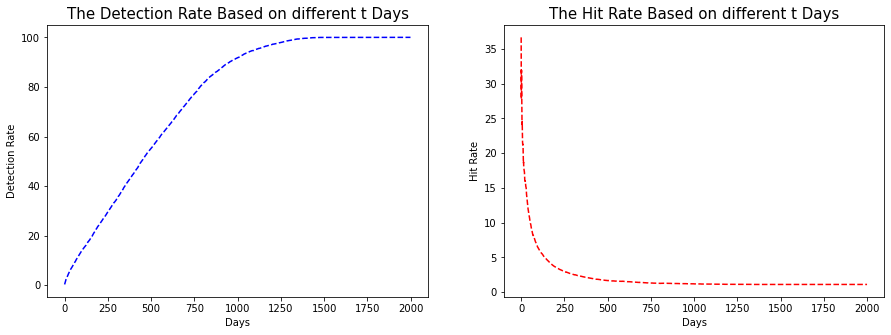

In [244]:
fig = plt.figure(figsize = (15, 5))
AX1 = fig.add_subplot(1,2,1)
AX2 = fig.add_subplot(1,2,2)
t = range(2000)

AX1.plot(t, d, ls = "--", color = "blue")
AX2.plot(t, h, ls = "--", color = "red")

AX1.set_title("The Detection Rate Based on different t Days", fontsize = 15, horizontalalignment="center")
AX2.set_title("The Hit Rate Based on different t Days", fontsize = 15, horizontalalignment="center")

AX1.set_xlabel("Days", fontsize = 10)
AX1.set_ylabel("Detection Rate", fontsize = 10)

AX2.set_xlabel("Days", fontsize = 10)
AX2.set_ylabel("Hit Rate", fontsize = 10)

In [237]:
for i in t:
    print("t: {}, d: {}, h: {}".format(i, d[i], h[i]))

t: 0, d: 0.33, h: 36.67
t: 1, d: 0.59, h: 27.78
t: 2, d: 0.79, h: 31.94
t: 3, d: 0.94, h: 29.07
t: 4, d: 1.32, h: 25.83
t: 5, d: 1.59, h: 24.14
t: 6, d: 1.88, h: 24.56
t: 7, d: 2.12, h: 22.8
t: 8, d: 2.34, h: 21.6
t: 9, d: 2.48, h: 21.24
t: 10, d: 2.58, h: 21.28
t: 11, d: 2.73, h: 20.88
t: 12, d: 2.97, h: 19.19
t: 13, d: 3.08, h: 18.51
t: 14, d: 3.28, h: 18.73
t: 15, d: 3.43, h: 17.89
t: 16, d: 3.59, h: 17.74
t: 17, d: 3.8, h: 17.58
t: 18, d: 3.97, h: 17.4
t: 19, d: 4.07, h: 17.25
